# Hubble 

In [ ]:
#data from Vizier (there are mirrors if database is down) Package DataFrames

In [1]:
] add DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DataAPI ───────────── v1.16.0
   Installed Crayons ───────────── v4.1.1
   Installed SentinelArrays ────── v1.4.8
   Installed PooledArrays ──────── v1.4.3
   Installed Tables ────────────── v1.12.1
   Installed TableTraits ───────── v1.0.1
   Installed InlineStrings ─────── v1.4.5
   Installed DataValueInterfaces ─ v1.0.0
   Installed Missings ──────────── v1.2.0
   Installed InvertedIndices ───── v1.3.1
   Installed StringManipulation ── v0.4.1
   Installed PrettyTables ──────── v3.1.0
   Installed SortingAlgorithms ─── v1.2.2
   Installed DataFrames ────────── v1.8.1
    Updating `/workspaces/phys2200-lectures-mis16121/Project.toml`
  [a93c6f00] + DataFrames v1.8.1
    Updating `/workspaces/phys2200-lectures-mis16121/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [9a962f9c] + DataAPI v1.16.0
  [a93c6f00] + DataFrames v1.8.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [842dd82b] 

In [2]:
] add CSV

   Resolving package versions...
   Installed WorkerUtilities ──── v1.6.1
   Installed CodecZlib ────────── v0.7.8
   Installed WeakRefStrings ───── v1.4.2
   Installed FilePathsBase ────── v0.9.24
   Installed TranscodingStreams ─ v0.11.3
   Installed CSV ──────────────── v0.10.15
    Updating `/workspaces/phys2200-lectures-mis16121/Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `/workspaces/phys2200-lectures-mis16121/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [944b1d66] + CodecZlib v0.7.8
  [48062228] + FilePathsBase v0.9.24
  [3bb67fe8] + TranscodingStreams v0.11.3
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
Precompiling project...
   1183.2 ms  ✓ WorkerUtilities
   1295.7 ms  ✓ TranscodingStreams
   2166.7 ms  ✓ FilePathsBase
   1099.6 ms  ✓ CodecZlib
   1859.8 ms  ✓ WeakRefStrings
    859.9 ms  ✓ FilePathsBase → FilePathsBaseMmapExt
   1721.4 ms  ✓ FilePathsBase → FilePathsBaseTestExt
  22248.9 ms  ✓ CSV
  8 dependencies successfully precom

In [3]:
using DataFrames
using CSV 
using PyPlot

In [4]:
url = "https://vizier.u-strasbg.fr/viz-bin/asu-txt?-source=J/ApJ/716/712/tableb2&-out=SN&-out=zCMB&-out=mu"

"https://vizier.u-strasbg.fr/viz-bin/asu-txt?-source=J/ApJ/716/712/tableb2&-out=SN&-out=zCMB&-out=mu"

In [6]:
catalog = download(url);

In [7]:
df = CSV.read(catalog, DataFrame, skipto=38, delim=' ', ignorerepeated=true,
              types=[String, Float64, Float64], silencewarnings=true,
              header=["name", "redshift", "modulus"],)

Row,name,redshift,modulus
,String,Float64?,Float64?
1,------,missing,missing
2,1993ah,0.0285,34.61
3,1993ag,0.05,35.95
4,1993o,0.0529,36.09
5,1993b,0.0701,36.71
6,1992bs,0.0627,36.75
7,1992br,0.0876,37.5
8,1992bp,0.0786,36.76
9,1992bo,0.0172,33.93


In [8]:
dropmissing!(df)

Row,name,redshift,modulus
,String,Float64,Float64
1,1993ah,0.0285,34.61
2,1993ag,0.05,35.95
3,1993o,0.0529,36.09
4,1993b,0.0701,36.71
5,1992bs,0.0627,36.75
6,1992br,0.0876,37.5
7,1992bp,0.0786,36.76
8,1992bo,0.0172,33.93
9,1992bl,0.0422,35.61


In [10]:
filter!(row -> row.redshift < 0.04, df)

Row,name,redshift,modulus
,String,Float64,Float64
1,1993ah,0.0285,34.61
2,1992bo,0.0172,33.93
3,1992bg,0.0365,35.18
4,1992bc,0.0196,33.86
5,1992al,0.0135,33.1
6,1992ag,0.0273,34.35
7,1992p,0.0265,34.75
8,1990o,0.0306,34.82
9,1991ag,0.0139,32.88


In [15]:
dist(modulus) = 10.0 ^ (modulus / 5 - 5)

dist (generic function with 1 method)

In [16]:
sort!(df, "modulus")

Row,name,redshift,modulus
,String,Float64,Float64
1,2006mq,0.004,29.06
2,2006x,0.0063,30.34
3,1999cl,0.0087,30.35
4,2007sr,0.0067,30.92
5,1996ai,0.003,30.96
6,2003cg,0.0053,31.25
7,2002bo,0.0053,31.29
8,2007af,0.0063,31.34
9,1996x,0.007,31.36


In [17]:
distances = dist.(df.modulus);

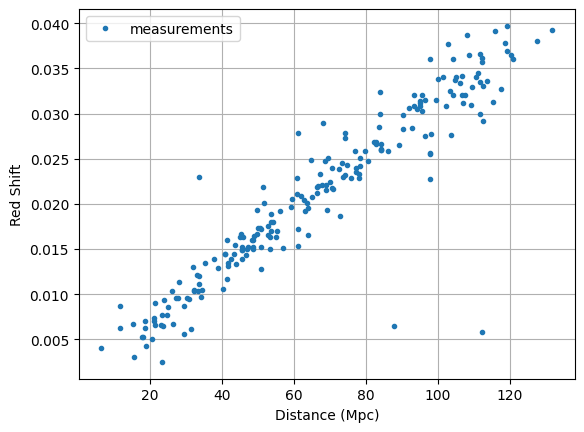

In [18]:
plot(distances, df.redshift, ".", label="measurements")
grid(true)
legend()
ylabel("Red Shift")
xlabel("Distance (Mpc)");

In [19]:

"""
   alpha, beta, sigma = linear_regression(x, y)

Least square linear regression fit y = alpha + beta * x
Sigma is standard deviation for beta
"""
function linear_regression(x, y)
    n = length(x)
    xbar = sum(x)/n
    ybar = sum(y)/n
    denom = sum((x .- xbar).^2)
    beta = sum((x .- xbar).*(y .- ybar))/denom
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta*x).^2)/((n - 2)*denom))
    return alpha, beta, sigma
end

linear_regression

In [20]:
alpha, beta, sigma = linear_regression(distances, df.redshift)

(0.0017178200333416473, 0.00029046546432479547, 7.732717671636245e-6)

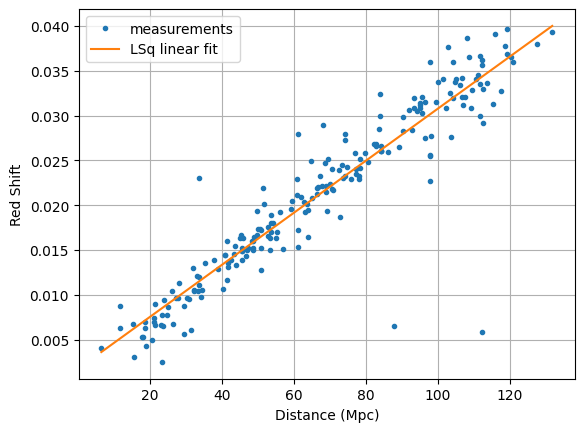

In [21]:

plot(distances, df.redshift, ".", label="measurements")
plot(distances, alpha .+ beta*distances, label="LSq linear fit")
grid(true)
legend()
ylabel("Red Shift")
xlabel("Distance (Mpc)");

In [22]:
const c = 300000.0  # speed of light, km/sec
H0 = c * beta
round(H0, digits=3)

87.14

In [23]:
dH0 = c * sigma

2.319815301490874

In [24]:

const mpc = 3.09e19     # 1 megaparsec in km
h0 = H0 / mpc
round(h0, sigdigits=3)

2.82e-18

In [25]:

Th = 1 / h0
round(Th, sigdigits=3)

3.55e17

In [30]:
round(Th/(60*60*24*365), sigdigits=4)

1.124e10